# 2020 Presidential Campaign Speeches

In [72]:
import numpy as np 
import pandas as pd 
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode (connected = True)
import seaborn as sns
sns.set_style('darkgrid')
import nltk
from wordcloud import WordCloud,STOPWORDS
import string
import re
import spacy as sp
nlps = sp.load('en')

## Data Collection

The dataset contains the transcripts of campaign speeches of both candidates Biden and Trump, from August,2019 to November, 2020. 

## Data Loading

In [73]:
biden =  pd.read_csv("biden_rally_transcripts.csv")
biden = biden.drop('Unnamed: 0', axis=1)
b_loc_date = pd.read_excel("biden_speech_date_location.xlsx")
trump = pd.read_csv("trump_rally_transcripts.csv")
trump = trump.drop('Unnamed: 0', axis=1)
t_loc_date = pd.read_excel("trump_speech_date_location.xlsx")

In [74]:
biden_speeches = biden.merge(b_loc_date)
trump_speeches = trump.merge(t_loc_date)

## Feature Engineering 

In [75]:
# group states by color
swing_states = ['GA','NC','AZ','FL','IA','MI','NV','NH','OH','PA','TX','WI']
blue = ['WA','OR','CA','CO','NM','HI','MN','IL','ME','NY','VA','VT','MA','RI',
       'CT','NJ','DE','MD','DC']
biden_speeches['state type'] = 'red state'
biden_speeches.loc[biden_speeches['state'].isin(swing_states),'state type']='swing state'
biden_speeches.loc[biden_speeches['state'].isin(blue),'state type']='blue state'

trump_speeches['state type'] = 'red state'
trump_speeches.loc[trump_speeches['state'].isin(swing_states),'state type']='swing state'
trump_speeches.loc[trump_speeches['state'].isin(blue),'state type']='blue state'


In [322]:
from nrclex import NRCLex
biden_speeches['nrc'] = biden_speeches['transcript'].apply(lambda x: NRCLex(x))

In [328]:
biden_speeches['fear'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['fear'])
biden_speeches['anger'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['anger'])
biden_speeches['anticipation'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['anticipation'])
biden_speeches['trust'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['trust'])
biden_speeches['surprise'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['surprise'])
biden_speeches['positive'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['positive'])
biden_speeches['negative'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['negative'])
biden_speeches['sadness'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['sadness'])
biden_speeches['disgust'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['disgust'])
biden_speeches['joy'] = biden_speeches['nrc'].apply(lambda x: x.affect_frequencies['joy'])

In [323]:
trump_speeches['nrc'] = trump_speeches['transcript'].apply(lambda x: NRCLex(x))

In [329]:
trump_speeches['fear'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['fear'])
trump_speeches['anger'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['anger'])
trump_speeches['anticipation'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['anticipation'])
trump_speeches['trust'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['trust'])
trump_speeches['surprise'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['surprise'])
trump_speeches['positive'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['positive'])
trump_speeches['negative'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['negative'])
trump_speeches['sadness'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['sadness'])
trump_speeches['disgust'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['disgust'])
trump_speeches['joy'] = trump_speeches['nrc'].apply(lambda x: x.affect_frequencies['joy'])

## Emotion Analysis

In [ ]:
biden_speeches2 = biden_speeches.loc[biden_speeches['state type']=='swing state',]
trump_speeches2 = trump_speeches.loc[trump_speeches['state type']=='swing state',]

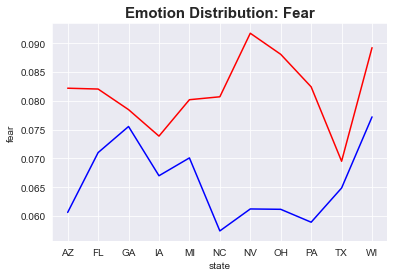

In [336]:
t_fear=trump_speeches2['fear'].groupby(trump_speeches2['state']).median()
b_fear=biden_speeches2['fear'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_fear.index.tolist()[0:6]  + t_fear.index.tolist()[7:],
                  y=t_fear.values.tolist()[0:6]  + t_fear.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_fear.index,y= b_fear,color='blue')
ax.set_title('Emotion Distribution: Fear',fontsize=15,fontweight='bold')
plt.show()

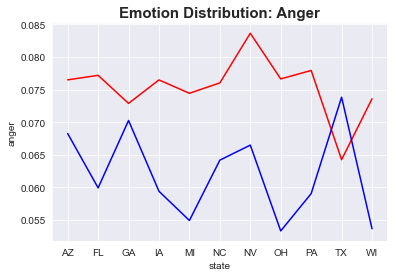

In [338]:
t_angry=trump_speeches2['anger'].groupby(trump_speeches2['state']).median()
b_angry=biden_speeches2['anger'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_angry.index.tolist()[0:6]  + t_angry.index.tolist()[7:],
                  y=t_angry.values.tolist()[0:6]  + t_angry.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_angry.index,y= b_angry,color='blue')
ax.set_title('Emotion Distribution: Anger',fontsize=15,fontweight='bold')
plt.show()

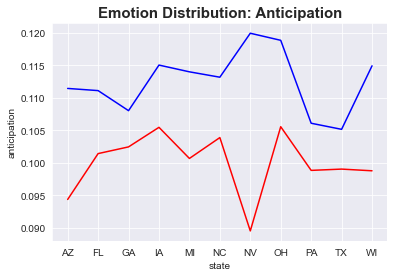

In [339]:
t_ant=trump_speeches2['anticipation'].groupby(trump_speeches2['state']).median()
b_ant=biden_speeches2['anticipation'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_ant.index.tolist()[0:6]  + t_ant.index.tolist()[7:],
                  y=t_ant.values.tolist()[0:6]  + t_ant.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_ant.index,y= b_ant,color='blue')
ax.set_title('Emotion Distribution: Anticipation',fontsize=15,fontweight='bold')
plt.show()

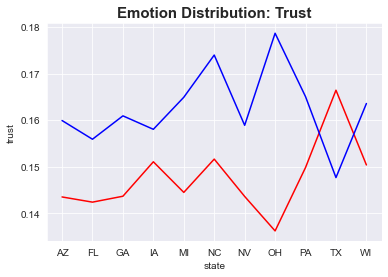

In [340]:
t_trust=trump_speeches2['trust'].groupby(trump_speeches2['state']).median()
b_trust=biden_speeches2['trust'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_trust.index.tolist()[0:6]  + t_trust.index.tolist()[7:],
                  y=t_trust.values.tolist()[0:6]  + t_trust.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_trust.index,y = b_trust,color='blue')
ax.set_title('Emotion Distribution: Trust',fontsize=15,fontweight='bold')
plt.show()

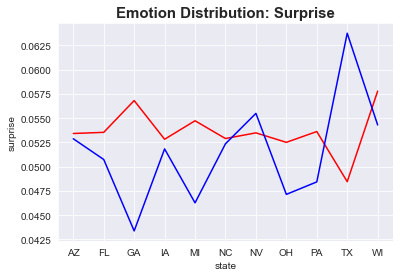

In [341]:
t_surprise=trump_speeches2['surprise'].groupby(trump_speeches2['state']).median()
b_surprise=biden_speeches2['surprise'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_surprise.index.tolist()[0:6]  + t_surprise.index.tolist()[7:],
                  y=t_surprise.values.tolist()[0:6]  + t_surprise.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_surprise.index,y= b_surprise,color='blue')
ax.set_title('Emotion Distribution: Surprise',fontsize=15,fontweight='bold')
plt.show()

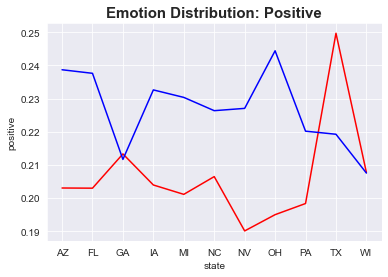

In [343]:
t_pos=trump_speeches2['positive'].groupby(trump_speeches2['state']).median()
b_pos=biden_speeches2['positive'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_pos.index.tolist()[0:6]  + t_pos.index.tolist()[7:],
                  y=t_pos.values.tolist()[0:6]  + t_pos.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_pos.index,y= b_pos,color='blue')
ax.set_title('Emotion Distribution: Positive',fontsize=15,fontweight='bold')
plt.show()

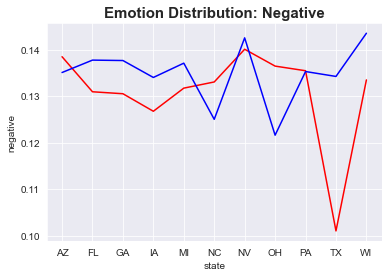

In [345]:
t_neg=trump_speeches2['negative'].groupby(trump_speeches2['state']).median()
b_neg=biden_speeches2['negative'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_neg.index.tolist()[0:6]  + t_neg.index.tolist()[7:],
                  y=t_neg.values.tolist()[0:6]  + t_neg.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_neg.index,y= b_neg,color='blue')
ax.set_title('Emotion Distribution: Negative',fontsize=15,fontweight='bold')
plt.show()

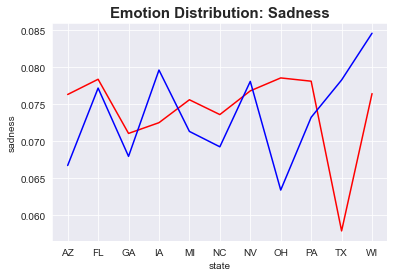

In [346]:
t_sad=trump_speeches2['sadness'].groupby(trump_speeches2['state']).median()
b_sad=biden_speeches2['sadness'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_sad.index.tolist()[0:6]  + t_sad.index.tolist()[7:],
                  y=t_sad.values.tolist()[0:6]  + t_sad.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_sad.index,y= b_sad,color='blue')
ax.set_title('Emotion Distribution: Sadness',fontsize=15,fontweight='bold')
plt.show()

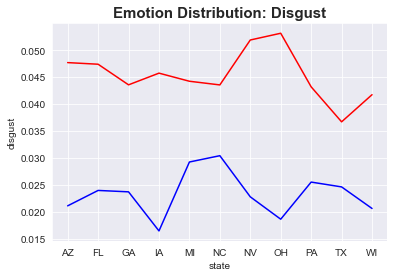

In [348]:
t_disgust=trump_speeches2['disgust'].groupby(trump_speeches2['state']).median()
b_disgust=biden_speeches2['disgust'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_disgust.index.tolist()[0:6]  + t_disgust.index.tolist()[7:],
                  y=t_disgust.values.tolist()[0:6]  + t_disgust.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_disgust.index,y= b_disgust,color='blue')
ax.set_title('Emotion Distribution: Disgust',fontsize=15,fontweight='bold')
plt.show()

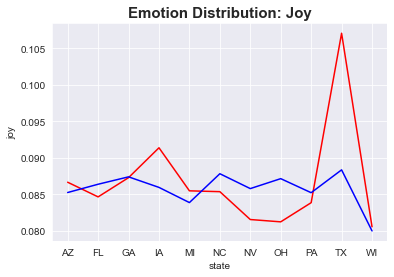

In [349]:
t_joy=trump_speeches2['joy'].groupby(trump_speeches2['state']).median()
b_joy=biden_speeches2['joy'].groupby(biden_speeches2['state']).median()

ax = sns.lineplot(x=t_joy.index.tolist()[0:6]  + t_joy.index.tolist()[7:],
                  y=t_joy.values.tolist()[0:6]  + t_joy.values.tolist()[7:],color='red')
ax = sns.lineplot(x=b_joy.index,y= b_joy,color='blue')
ax.set_title('Emotion Distribution: Joy',fontsize=15,fontweight='bold')
plt.show()

## Topic Modeling


In [432]:
speeches = biden_speeches2['transcript'].append(trump_speeches2['transcript'])

In [438]:
import spacy
nlp = spacy.load('en')


def pos(text):
    newtxt =[]
    doc = nlp(text)
    for t in doc:
        if t.pos_ =='NOUN' or t.pos_ =='ADJ':
            newtxt.append(t.lemma_)
    return ' '.join(newtxt)


In [444]:
lemmas = speeches.apply(lambda x: pos(x))
lemmas.head()

0    name way idea old expression dad thing term jo...
1    ready election more day more day grateful grat...
2    inaudible guy big round applause fantastic nur...
3    good outstanding band special thank local stat...
4    crazy mother thank thing able whole career uni...
Name: transcript, dtype: object

### NMF

In [448]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.95)
dtm2= tv.fit_transform(lemmas)

In [516]:
from sklearn.decomposition import NMF

model2 = NMF(n_components=5,random_state=100)
model2.fit_transform(dtm2)
n_words = 20
feature_names2 = tv.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model2.components_):
    top_n = [feature_names2[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")



Topic 0: right big guy bad world state history president hell deal incredible nice number vote little half corrupt fake beautiful crazy
Topic 1: folk president nation justice plan black duty pandemic division kid virus tomorrow democracy world vote change violence community white climate
Topic 2: stake crisis right ancestor midst health difficult power moment wildfire hand election issue folk 28th fight racial clear president obsession
Topic 3: folk dad union president tax worker plan able sure middle home infrastructure kid labor school guy table train world mom
Topic 4: right border new big deal number wall bad guy incredible illegal party alien history beautiful state thousand world sir money


In [517]:
doc_topic_matrix2 = model2.fit_transform(dtm2)

In [518]:
topic2 = doc_topic_matrix2.argmax(axis=1)

In [519]:
#biden's speech topics
topic2[:len(biden_speeches2)]

array([3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 1])

In [521]:
#Trump's speech topics
topic2[len(biden_speeches2):]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])